<a href="https://colab.research.google.com/github/whiteibescu/AI/blob/main/Day03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape)

x_train, x_test = x_train.astype('float32')/255 , x_test.astype('float32')/255


(60000, 28, 28)


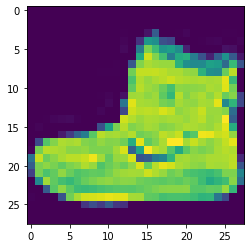

label :9


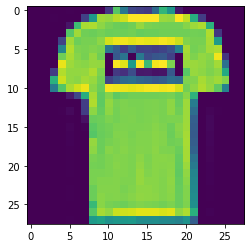

label :0


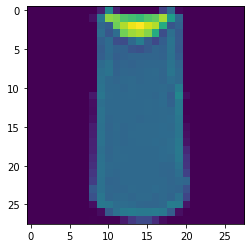

label :0


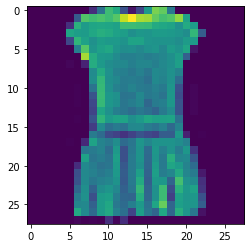

label :3


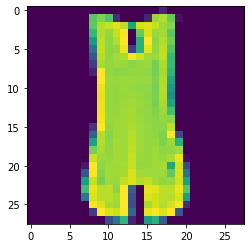

label :0


In [16]:
for i in range(5):
  plt.imshow(x_train[i])
  plt.show()
  print("label :%i" % y_train[i])

In [23]:
x_train = tf.reshape(x_train, [-1, 28, 28, 1])
x_test = tf.reshape(x_test, [-1, 28, 28, 1])
print(x_train.shape, x_test.shape)

# from sklearn.model_selection import train_test_split

# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=1/6, shuffle = True, stratify = y_train, random_state=34)
# print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

layer1 = Conv2D(input_shape = (28,28,1), kernel_size = (3,3), filters = 32, activation = 'relu')
layer2 = Conv2D(kernel_size = (3,3), filters = 64, activation = 'relu')
layer3 = MaxPool2D(pool_size=(2,2))
layer4 = Conv2D(kernel_size = (3,3), filters = 64, activation = 'relu')
layer5 = Conv2D(kernel_size = (3,3), filters = 64, activation = 'relu')
layer6 = MaxPool2D(pool_size=(2,2))
layer7 = Dropout(0.25)
layer8 = Flatten()
layer9 = Dense(64, activation='relu')
layer10 = Dropout(0.2)
layer11 = Dense(10, activation = 'softmax')

cnn = Sequential([layer1, layer2, layer3, layer4, layer5, layer6, layer7, layer8, layer9, layer10, layer11])

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [24]:
cnn.compile(loss= "sparse_catergorical_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0